In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
wine = pd.read_csv('./winequality-red.csv')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Exploring Dataset

In [3]:
list(wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We see that, there is big difference between Mean and 50% for column - 'Free Sulphur Dioxide' and 'Total Sulphur'. Means there is skewness.
Also, we see big difference between Max and 75% for columns except - 'Quality' and Alcohol, denoting outliers in the dataset

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no missing value. It's a great thing! Phew!

## Checking Outliers

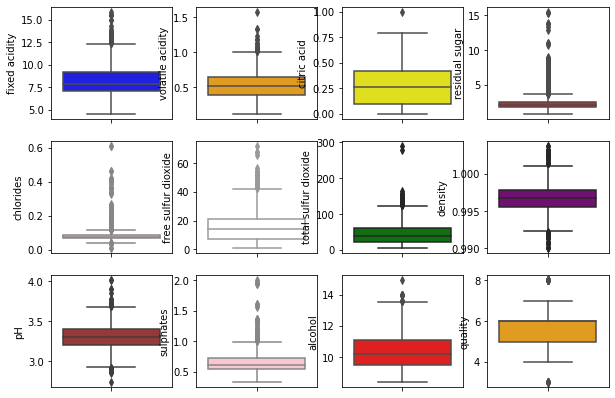

In [7]:
f, axes = plt.subplots(3, 4, figsize=(10, 7), sharex=True)

sns.boxplot('fixed acidity',data=wine,orient='v',ax=axes[0,0],color='Blue')

sns.boxplot('volatile acidity',data=wine,orient='v',ax=axes[0,1],color='orange')

sns.boxplot('citric acid',data=wine,orient='v',ax=axes[0,2],color='yellow')

sns.boxplot('residual sugar',data=wine,orient='v',ax=axes[0,3],color='red')

sns.boxplot('chlorides',data=wine,orient='v',ax=axes[1,0],color='pink')

sns.boxplot('free sulfur dioxide',data=wine,orient='v',ax=axes[1,1],color='white')

sns.boxplot('total sulfur dioxide',data=wine,orient='v',ax=axes[1,2],color='green')

sns.boxplot('density',data=wine,orient='v',ax=axes[1,3],color='purple')

sns.boxplot('pH',data=wine,orient='v',ax=axes[2,0],color='brown')

sns.boxplot('sulphates',data=wine,orient='v',ax=axes[2,1],color='pink')

sns.boxplot('alcohol',data=wine,orient='v',ax=axes[2,2],color='red')

sns.boxplot('quality',data=wine,orient='v',ax=axes[2,3],color='orange')

## Plotting graph for Correlation

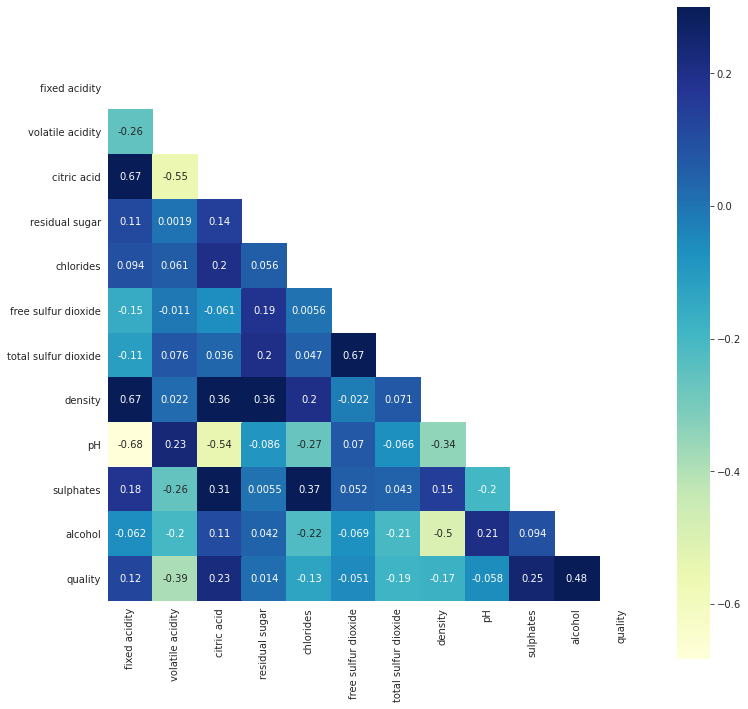

In [8]:
corr = wine.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     f, ax = plt.subplots(figsize=(12, 12))
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="YlGnBu",annot=True)

## Plotting Graphs to check Dependency of features on Quality

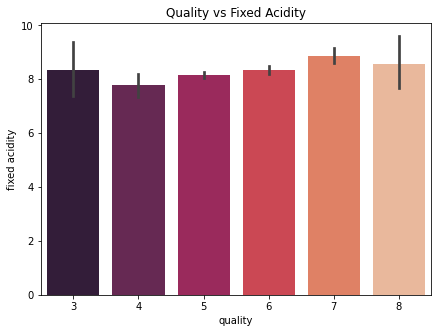

In [9]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Fixed Acidity")
sns.barplot(x='quality',y='fixed acidity',data=wine,palette='rocket')

On increasing FIXED ACIDITY, QUALITY INCREASE

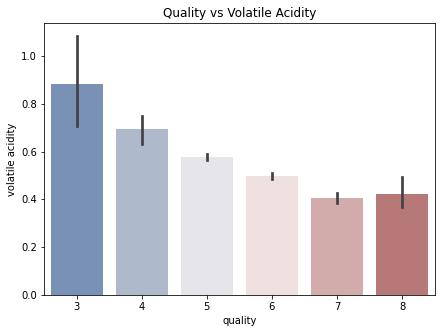

In [22]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Volatile Acidity")
sns.barplot(x='quality',y='volatile acidity',data=wine,palette='vlag')

On INCREASING VOLATILE ACIDITY, QUALITY DECREASES

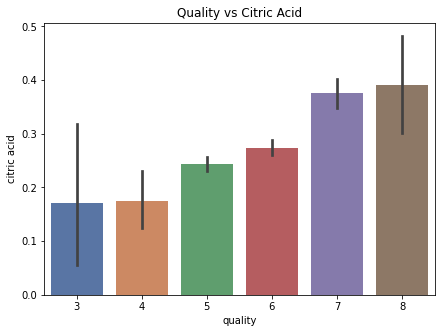

In [11]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Citric Acid")
sns.barplot(x='quality',y='citric acid',data=wine,palette='deep')

On INCREASING CITRIC ACID, QUALITY INCREASE

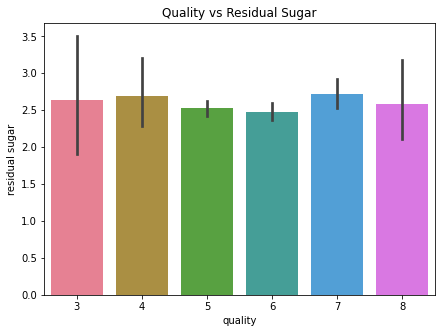

In [12]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Residual Sugar")
sns.barplot(x='quality',y='residual sugar',data=wine,palette='husl')

There is a small Positive correlation between Residual SUgar and Quality which means it doesn't affect the quality much

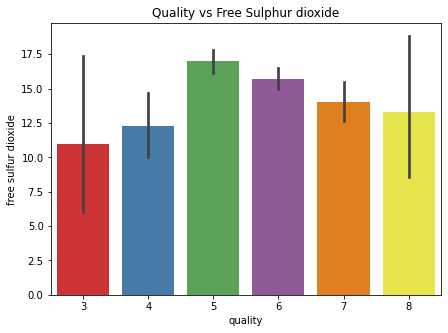

In [13]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Free Sulphur dioxide")
sns.barplot(x='quality',y='free sulfur dioxide',data=wine,palette='Set1')

SMALL NEGATIVE CORRELATION

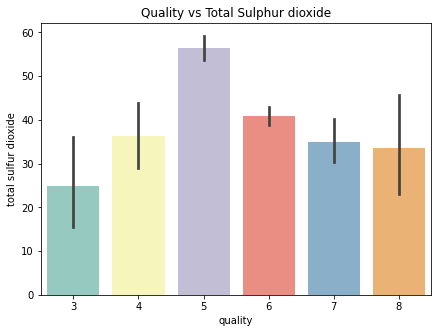

In [14]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Total Sulphur dioxide")
sns.barplot(x='quality',y='total sulfur dioxide',data=wine,palette='Set3')

QUALITY DECREASES with INCREASE in TOTAL SULFUR DIOXIDE

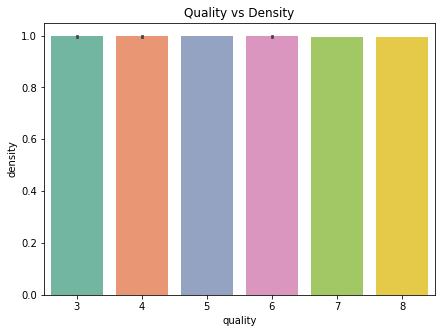

In [15]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Density")
sns.barplot(x='quality',y='density',data=wine,palette='Set2')

SMALL DECREASE in QUALITY with INCREASE in DENSITY

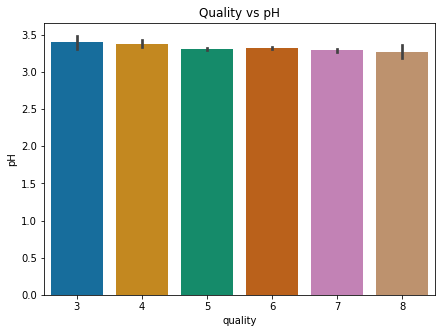

In [16]:
plt.figure(figsize=(7,5))
plt.title("Quality vs pH")
sns.barplot(x='quality',y='pH',data=wine,palette='colorblind')

SMALL NEGATIVE CORRELATION BETWEEN pH and Quality. Doesn't seem to affect much!

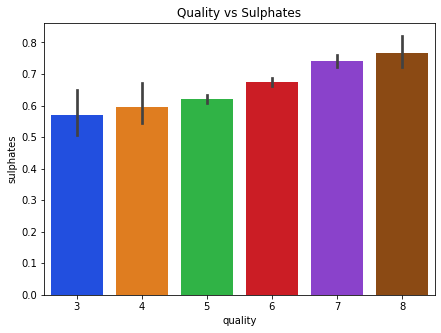

In [17]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Sulphates")
sns.barplot(x='quality',y='sulphates',data=wine,palette='bright')

QUALITY INCREASES with INCREASE in SULPHATES

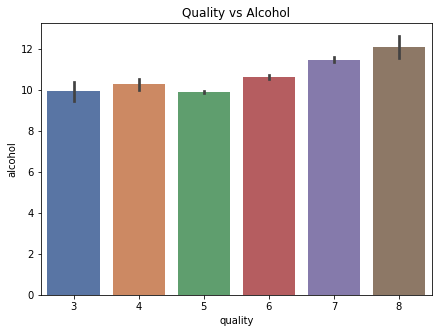

In [18]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Alcohol")
sns.barplot(x='quality',y='alcohol',data=wine,palette='deep')

QUALITY INCREASES with INCREASE of ALCOHOL